# Big mart sales

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

Variable : Description

Item_Identifier : Unique product ID

Item_Weight : Weight of product

Item_Fat_Content : Whether the product is low fat or not

Item_Visibility : The % of total display area of all products in a store allocated to the particular product

Item_Type : The category to which the product belongs

Item_MRP : Maximum Retail Price (list price) of the product

Outlet_Identifier : Unique store ID

Outlet_Establishment_Year : The year in which store was established

Outlet_Size : The size of the store in terms of ground area covered

Outlet_Location_Type : The type of city in which the store is located

Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales : Sales of the product in the particulat store. This is the outcome variable to be predicted.

# Importing the libraries

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline 
warnings.filterwarnings('ignore')

# Loading the dataset 

In [199]:
df = pd.read_csv("~/Downloads/train_v9rqX0R.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Statistical summary 

In [200]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Checking types of features 

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data preprocessing 

## Checking the null values 

In [202]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are missing values present in the dataset

In [203]:
df_cat=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        df_cat.append(i)
df_cat    

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [204]:
df_cat.remove('Item_Identifier')
df_cat.remove('Outlet_Identifier')
df_cat

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [205]:
for col in df_cat:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

## Treating the missing values

In [206]:
item_weight_mean=df.pivot_table(values='Item_Weight',index='Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [207]:
miss = df['Item_Weight'].isnull()
miss

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [208]:
for i, item in enumerate(df['Item_Weight']):
    if miss[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i]= item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i]=np.mean(df['Item_Weight'])          

In [209]:
df.Item_Weight.isnull().sum()

0

In [210]:
outlet_size=df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [211]:
miss2=df['Outlet_Size'].isnull()
df.loc[miss2,'Outlet_Size']=df.loc[miss2,'Outlet_Type'].apply(lambda x: outlet_size[x])

In [212]:
df.Outlet_Size.isnull().sum()

0

In [213]:
sum(df['Item_Visibility']==0)

526

In [214]:
df.loc[:,'Item_Visibility'].replace([0],df['Item_Visibility'].mean(),inplace=True)
sum(df['Item_Visibility']==0)

0

In [215]:
#combining the item fat content
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [216]:
df['New_item']=df['Item_Identifier'].apply(lambda x:x[:2])
df['New_item']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_item, Length: 8523, dtype: object

In [217]:
df['New_item']=df['New_item'].map({'FD':'Food','NC':'Non_consumable','DR':'Drinks'})
df['New_item'].value_counts()

Food              6125
Non_consumable    1599
Drinks             799
Name: New_item, dtype: int64

In [218]:
df.loc[df['New_item']=='Non_consumable','Item_Fat_Content']='Non_Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non_Edible    1599
Name: Item_Fat_Content, dtype: int64

In [219]:
df['Outlet_year']=2013 - df['Outlet_Establishment_Year']
df['Outlet_year']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_year, Length: 8523, dtype: int64

In [220]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_item,Outlet_year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non_Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non_consumable,26


# Exploratory data analysis

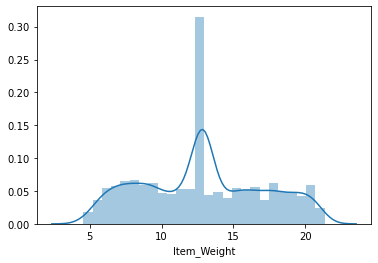

In [221]:
sns.distplot(df['Item_Weight'])
plt.show()

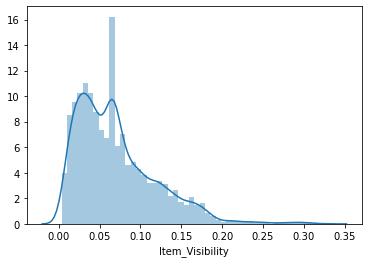

In [222]:
sns.distplot(df['Item_Visibility'])
plt.show()

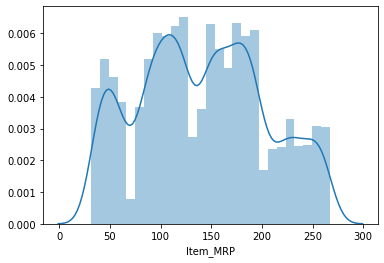

In [223]:
sns.distplot(df['Item_MRP'])
plt.show()

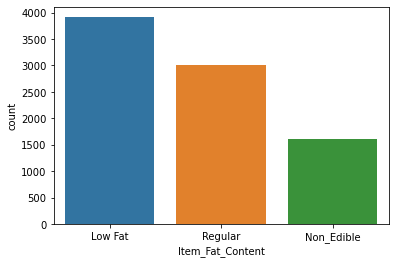

In [225]:
sns.countplot(df['Item_Fat_Content'])
plt.show()

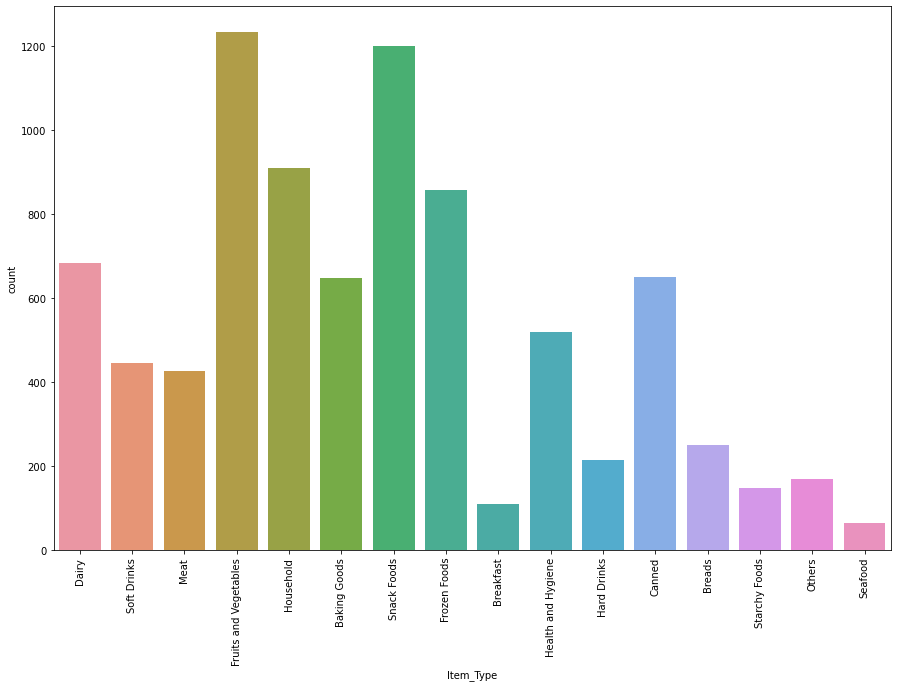

In [226]:
plt.figure(figsize=(15,10))
sns.countplot(df['Item_Type'])
plt.xticks(rotation=90)
plt.show()

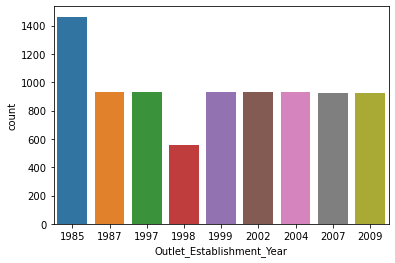

In [227]:
sns.countplot(df['Outlet_Establishment_Year'])
plt.show()

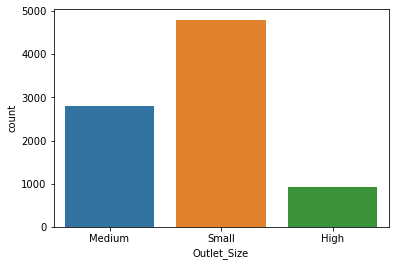

In [228]:
sns.countplot(df['Outlet_Size'])
plt.show()

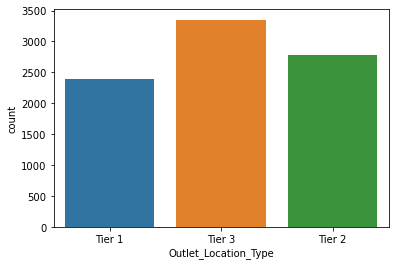

In [229]:
sns.countplot(df['Outlet_Location_Type'])
plt.show()

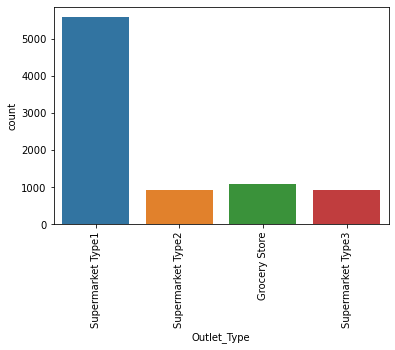

In [230]:
sns.countplot(df['Outlet_Type'])
plt.xticks(rotation=90)
plt.show()

INFERENCE:
-The price of items is in range from 25 to 275
-The low fat products are more preferred by the store, hence they stock up more
-Fruits and vegetables, snack foods, house hold, frozen foods 's stock is the most. They are daily consumables.
-The outlet size is mostly small and the maximum number of outlets are located in tier 3 cities.

## Bivariate analysis

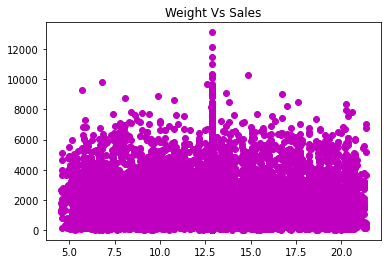

In [231]:
plt.scatter(df.Item_Weight, df.Item_Outlet_Sales, c = "m")
plt.title("Weight Vs Sales")
plt.show()

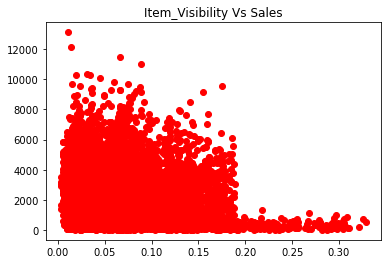

In [232]:
plt.scatter(df.Item_Visibility, df.Item_Outlet_Sales, c = "r")
plt.title("Item_Visibility Vs Sales")
plt.show()

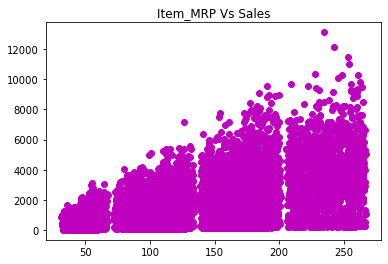

In [233]:
# Item_MRP Vs Sales
plt.scatter(df.Item_MRP, df.Item_Outlet_Sales, c = "m")
plt.title("Item_MRP Vs Sales")
plt.show()

# Inference - Bigger the products, lesser the sales

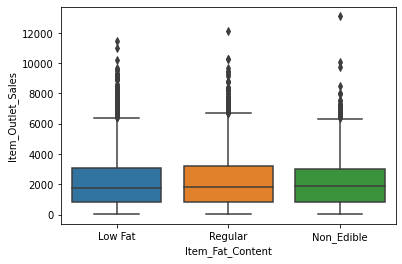

In [234]:
# Item Fat Content vs Sales
sns.boxplot(x = "Item_Fat_Content", y = "Item_Outlet_Sales", data = df)

In [235]:
df.groupby("Item_Fat_Content")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Fat_Content,,,,,,,,
Low Fat,3918.0,2163.829268,1726.302029,33.2900,830.9184,1733.0774,3060.84905,11445.1020
Non_Edible,1599.0,2142.721364,1626.907672,33.2900,815.6050,1874.8928,3016.73980,13086.9648
Regular,3006.0,2224.561170,1721.480865,33.9558,857.5504,1844.5989,3198.66965,12117.5600


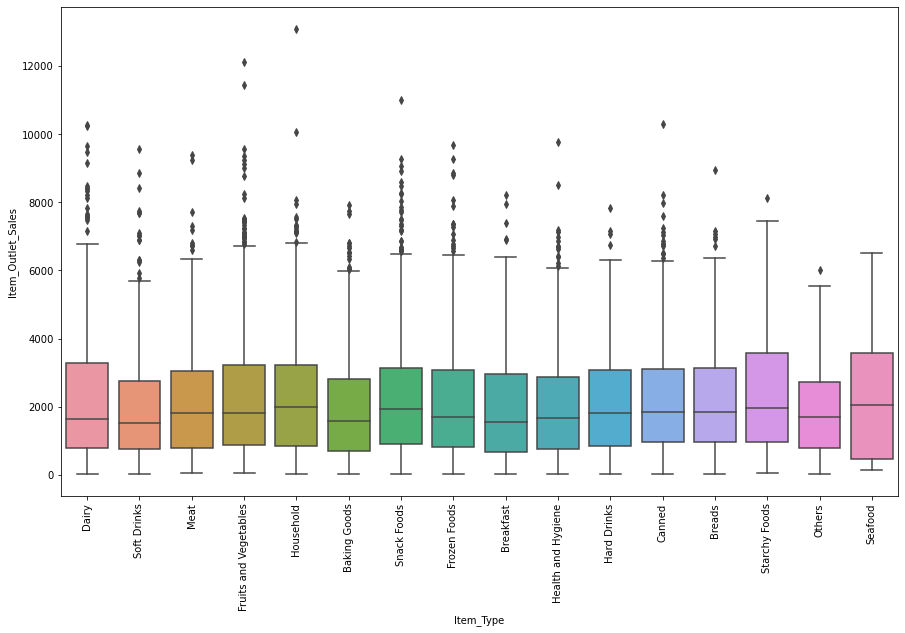

In [237]:
# Item Type vs Sales
plt.figure(figsize=(15,9))
sns.boxplot(x = "Item_Type", y = "Item_Outlet_Sales", data = df)
plt.xticks(rotation = 90)
plt.show()

# Inf: Fast Moving Prods - Fruits and Veggies, Dairy, Household, Snack Food, Soft Drinks..

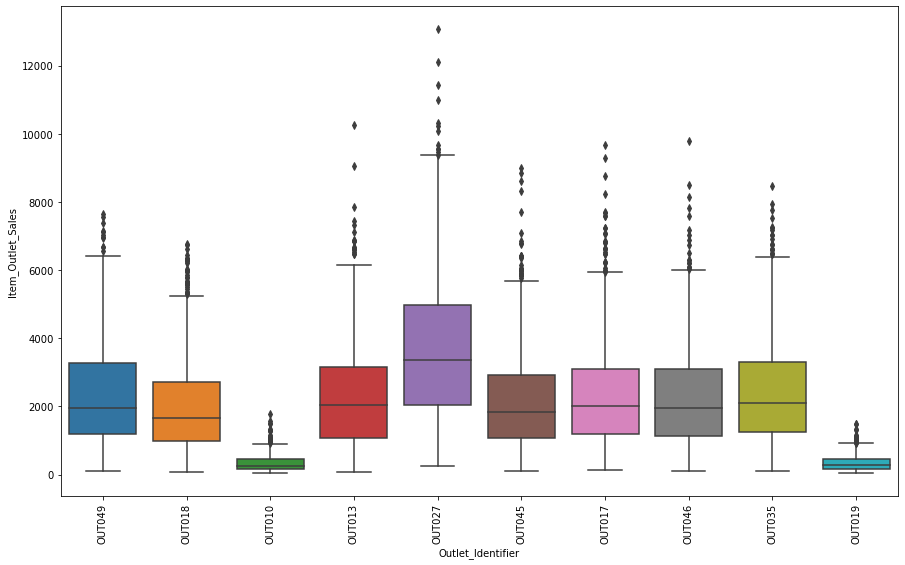

In [239]:
plt.figure(figsize=(15,9))
sns.boxplot(x = "Outlet_Identifier", y = "Item_Outlet_Sales", data = df)
plt.xticks(rotation = 90)
plt.show()

# Inf: Out027 and Out013 accounts for High Sales and Out010 & Out019 - Lowest Sales

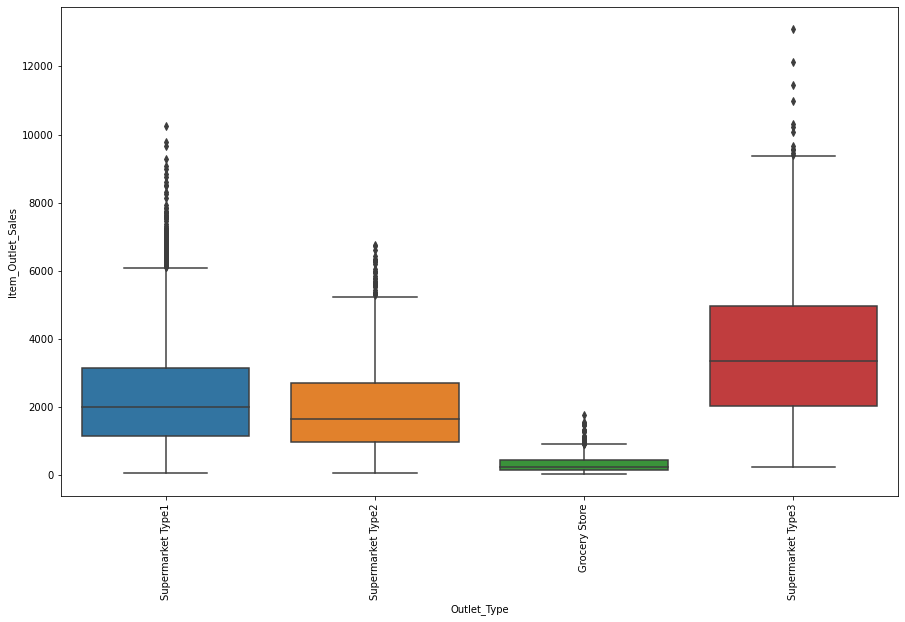

In [241]:
plt.figure(figsize=(15,9))
sns.boxplot(x = "Outlet_Type", y = "Item_Outlet_Sales", data = df)
plt.xticks(rotation = 90)
plt.show()

# Inf: S3 followed by S1 accounts for High Sales

Inference:
-Low Fat Items sell more than Regular
-Fast Moving Products are Fruits & Veggies, Snacks, Soft Drinks, Households
-Most of the sales are generated by Supermarket type 3

## Checking the target variable

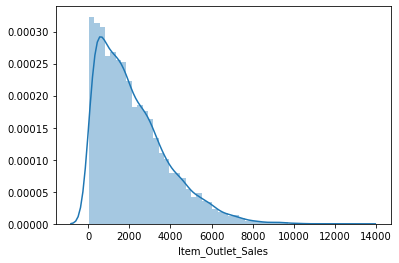

In [242]:
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

In [243]:
df['Item_Outlet_Sales']=np.log(1+df['Item_Outlet_Sales'])

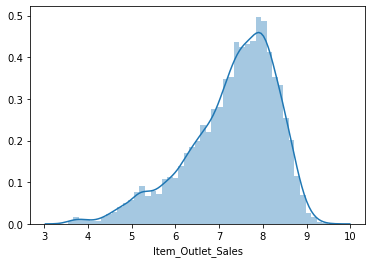

In [244]:
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

# Correlation Matrix

In [245]:
corr=df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_year
Item_Weight,1.000000,-0.017450,0.024756,-0.008301,0.008059,0.008301
Item_Visibility,-0.017450,1.000000,-0.005259,-0.078355,-0.202466,0.078355
Item_MRP,0.024756,-0.005259,1.000000,0.005020,0.509886,-0.005020
Outlet_Establishment_Year,-0.008301,-0.078355,0.005020,1.000000,0.077032,-1.000000
Item_Outlet_Sales,0.008059,-0.202466,0.509886,0.077032,1.000000,-0.077032
Outlet_year,0.008301,0.078355,-0.005020,-1.000000,-0.077032,1.000000


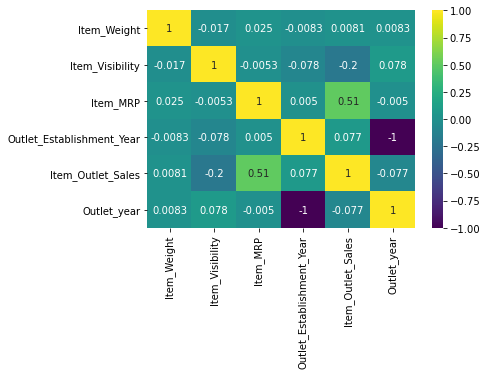

In [246]:
sns.heatmap(data=corr,annot=True,cmap='viridis')
plt.show()

We can see that Item_MRP has a positive correlation with Item outlet Sales

## Label Encoding

In [247]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Outlet']=le.fit_transform(df['Outlet_Identifier'])
cat_col=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_item']
for col in cat_col:
    df[col]=le.fit_transform(df[col])

## One hot encoding 

In [248]:
df=pd.get_dummies(df,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_item'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_year,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_item_0,New_item_1,New_item_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,0,0,1,0,1,0,0,0,0,1


## Input Split 

In [249]:
X=df.drop(['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']

## Model building

In [250]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model,X,y):
    model.fit(X,y)
    
    pred=model.predict(X)
    
    cv_score=cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)
    cv_score=np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score",cv_score)

Model Report
MSE: 0.28800650325017957
CV Score 0.28913252999364325


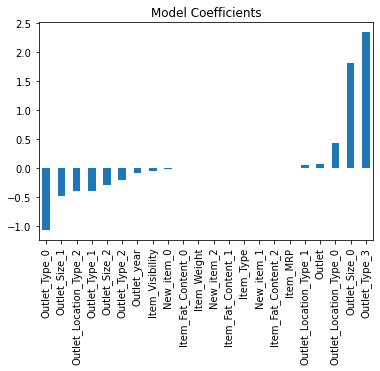

In [251]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model= LinearRegression(normalize=True)
train(model,X,y)
coef=pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

Model Report
MSE: 0.4280298560568348
CV Score 0.4289289251562642


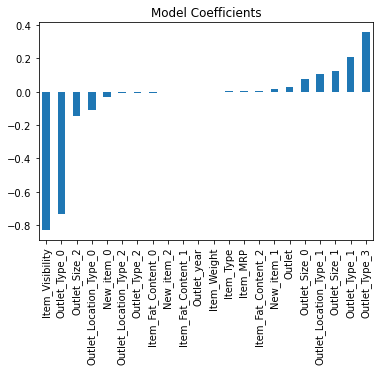

In [252]:
model= Ridge(normalize=True)
train(model,X,y)
coef=pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

Model Report
MSE: 0.7628688679102086
CV Score 0.7630789166281843


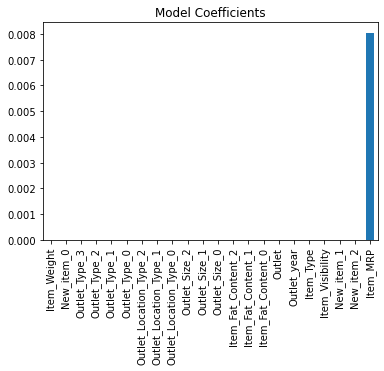

In [253]:
model= Lasso()
train(model,X,y)
coef=pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

Model Report
MSE: 5.5534030638578795e-34
CV Score 0.5801968138083612


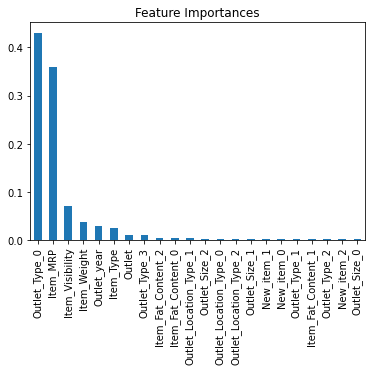

In [254]:
from sklearn.tree import DecisionTreeRegressor
model= DecisionTreeRegressor()
train(model,X,y)
coef=pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importances')

Model Report
MSE: 0.04286141662843704
CV Score 0.30977066825387134


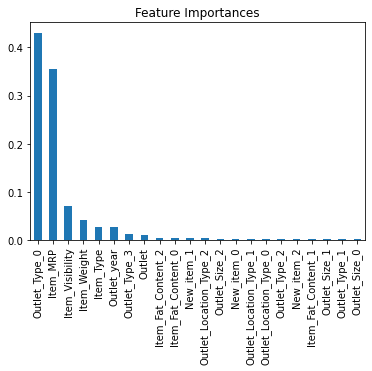

In [255]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
train(model,X,y)
coef=pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importances')

In [ ]:
# Conclusion

- We can conclude by saying that Linear regression model gives better result with the model report as:
MSE: 0.28800650325017957
CV Score 0.28913252999364325

-Outlet type 3, outlet size 0,outlet_location_type 0,outlet_location_type1 and item mrp are the most signifcant variables


-The mart can advertise on the products such as availability of breakfasts.Even though other fast moving goods are selling well, the breakfast can be also a good option to increase sales
-The mart can also spread awareness about health and hygiene products as the conciousness of people regarding health and fitness is increasing thus the products can help increasing the overall sales.
-Since the item MRP plays a significant role, discounts can be given on certain items to increase their sales, the layout can be designed with respect to the market basket analysis so that the items which are bought together are arranged together.